In [23]:
import tensorflow as tf

# setup a single GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
     # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')        
        gpu_config  = tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*4)
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [gpu_config])
        
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPU


In [24]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [25]:
data_dir = "C:/Users/Andrea Torcianti/Maschinenbau/Udemy/Techlabs/project/data_3_classes"

In [26]:
#this code checks if the data is ok 
from pathlib import Path
import imghdr


image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [27]:
# Get a list of all the image files in the directory
#this works only with the full directory, not if the images are in the data folder
img_files = [os.path.join(data_dir, f) 
             for f in os.listdir(data_dir) if f.endswith('.jpg') or f.endswith('.png')]

In [28]:
#get the class names
class_names = os.listdir(data_dir)
print(class_names)

['apples', 'banana_peels', 'oranges']


In [29]:
# Set the batch size and image size
batch_size = 2
img_size = (224, 224)

# Set the directory containing the images

# Create a training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)

# Create a validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation'
)


Found 110 files belonging to 3 classes.
Using 88 files for training.
Found 110 files belonging to 3 classes.
Using 22 files for validation.


In [30]:
val_ds.class_names

['apples', 'banana_peels', 'oranges']

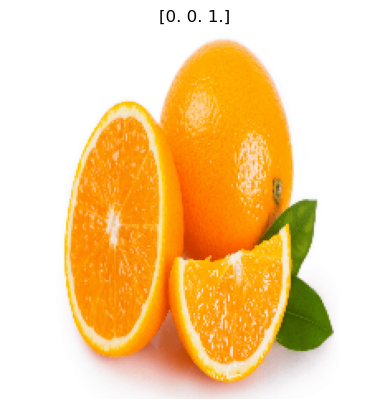

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Take the first batch of images and labels
for images, labels in train_ds.take(3):
    # Convert batch to NumPy array
    np_images = images.numpy()
    np_labels = labels.numpy()

# Plot the first image in the array
plt.imshow(np_images[0].astype('uint8'))
plt.axis('off')
plt.title(np_labels[0])
plt.show()


In [32]:
train_ds.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))

In [33]:
#normalize the dataset
def normalize(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

In [34]:
# Take the first batch of images and labels
for images, labels in train_ds.take(1):
    print(images.shape)
    print(images[0])

(2, 224, 224, 3)
tf.Tensor(
[[[8.7523007e-01 3.6934775e-01 8.5634254e-03]
  [8.6898762e-01 3.6678669e-01 2.0808333e-03]
  [8.5906363e-01 3.6438575e-01 0.0000000e+00]
  ...
  [2.2609049e-01 3.2412950e-02 9.6035475e-04]
  [2.0360148e-01 4.1936759e-02 2.0488013e-02]
  [1.9991995e-01 5.3141296e-02 2.0488512e-02]]

 [[8.6210483e-01 3.6310524e-01 9.6038461e-04]
  [8.4793919e-01 3.5518205e-01 3.2012831e-04]
  [8.4441775e-01 3.5422170e-01 0.0000000e+00]
  ...
  [2.4617849e-01 4.0015984e-02 1.4005585e-02]
  [2.2905171e-01 4.2497050e-02 2.8571395e-02]
  [2.2488964e-01 5.0980031e-02 3.0972110e-02]]

 [[8.3297324e-01 3.4821931e-01 2.4009674e-04]
  [8.3345342e-01 3.3989596e-01 0.0000000e+00]
  [8.2416970e-01 3.3885553e-01 4.8019321e-04]
  ...
  [2.3809516e-01 3.7454952e-02 2.3209257e-02]
  [2.4969988e-01 3.8175218e-02 2.2969224e-02]
  [2.4393772e-01 3.5294324e-02 1.2405185e-02]]

 ...

 [[8.5042018e-01 3.8151261e-01 3.6814800e-03]
  [8.3673471e-01 3.3653459e-01 4.0014781e-04]
  [7.4957985e-01 2.756

In [35]:
# Take the first batch of images and labels
for images, labels in val_ds.take(1):
    print(images.shape)
    print(images[0])

(2, 224, 224, 3)
tf.Tensor(
[[[0.7754202  0.75581235 0.73228294]
  [0.79054624 0.7709384  0.747409  ]
  [0.78823406 0.7686262  0.7450968 ]
  ...
  [0.96293765 0.96293765 0.96293765]
  [0.9647059  0.9647059  0.9647059 ]
  [0.9648598  0.9648598  0.9648598 ]]

 [[0.80258477 0.7829769  0.7594475 ]
  [0.8142345  0.79462665 0.77109724]
  [0.8145308  0.79492295 0.77139354]
  ...
  [0.9554797  0.9554797  0.9554797 ]
  [0.95940125 0.95940125 0.95940125]
  [0.9633228  0.9633228  0.9633228 ]]

 [[0.8166842  0.79707634 0.77354693]
  [0.8229029  0.8032951  0.77976567]
  [0.8245273  0.8049195  0.7813901 ]
  ...
  [0.9480217  0.9480217  0.9480217 ]
  [0.9519433  0.9519433  0.9519433 ]
  [0.95586485 0.95586485 0.95586485]]

 ...

 [[0.6781362  0.61146957 0.580097  ]
  [0.72717917 0.6605125  0.62913996]
  [0.66969573 0.6030291  0.5716565 ]
  ...
  [0.86133087 0.8456446  0.8338799 ]
  [0.90321857 0.8875323  0.8757676 ]
  [0.88677233 0.871086   0.8593213 ]]

 [[0.7016996  0.63503295 0.5958172 ]
  [0.7083

In [36]:
#this seems to create problems 
data_augmentation = tf.keras.Sequential([
tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
tf.keras.layers.RandomRotation(factor=0.05, seed=42),
tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

In [37]:
base_model = tf.keras.applications.xception.Xception(weights="imagenet",
                                                     include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(labels.shape[1], activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [38]:
base_model.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_2')>

In [39]:
#freeze the layers
for layer in base_model.layers:
    layer.trainable = False

In [40]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer,
metrics=["accuracy"])
history = model.fit(train_ds, validation_data=val_ds, epochs=3)

Epoch 1/3
44/44 [==============================] - 6s 70ms/step - loss: 0.3835 - accuracy: 0.8750 - val_loss: 0.0835 - val_accuracy: 1.0000
Epoch 2/3
44/44 [==============================] - 2s 50ms/step - loss: 0.0506 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 1.0000
Epoch 3/3
44/44 [==============================] - 2s 49ms/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 1.0000


In [41]:
y_true = []
y_pred = []
for images, labels in val_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))

cm = tf.math.confusion_matrix(y_true, y_pred)
print(cm)

1/1 [==============================] - 0s 16ms/step
tf.Tensor(
[[ 7  0  0]
 [ 0  4  0]
 [ 0  0 11]], shape=(3, 3), dtype=int32)
